# Example Application of SCS Method
The "Soil Conservation Service (SCS) method" is one of the simple rainfall-runoff models used to generate design flows from small watersheds. See Box 10.9, Box 10.10, and Table 10.13 for this example.

## Estimation of P*

We apply the SCS method to a rain event of 107 mm in 3.4 hr on a watershed of 3.21 square kilometers, mainstream length of 1.35 km, a main-channel slope of 0.08, and the land-cover characteristics shown in Table 10B10.1.

* * *
* * * 

**Table 10B10.1** Land Cover Characteristics

**Land Cover**  | **Soil Group** | **Area** $(km^2)$ | **Fraction of Total Area** | **Condition II Curve Number** 
--------------- | -------------- | ----------------- | -------------------------- | -----------------------------
Forest          | B              | 1.86              | 0.58                       | 58
Forest          | C              | 0.39              | 0.12                       | 72
Meadow          | A              | 0.67              | 0.21                       | 30
Meadow          | B              | 0.28              | 0.09                       | 58

The curve numbers for condition II were found from Table 10.11. The weighted-average curve number for condition II is calculated as the sum of the fraction of total area times the curve number 

$$ CN = (0.58 * 58) + (0.12 * 72) + (0.21 * 30) + (0.09 * 58) = 53.8 \rightarrow 54 $$

Then from Equation 10.67

$$ S_{max} = \frac{25,400}{CN} - 254 = \frac{25,400}{54} - 254 = 216 mm $$

and using this value in Equation 10.66 gives

$$ P^* = \frac{(P - 0.2*S_{max})^2}{P + 0.8*S_{max}} = \frac{(107mm - 0.2*216mm)^2}{(107mm + 0.8*216mm)} = 14 mm $$

An example code of this process is outlined below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Givens
P = 107 # rainfall event, mm 
T_Pstar = 3.4 # event duration, hr 
A_D = 3.21 # watershed area, km^2, 
L = 1.35 # mainstream length, km, 
Sc = 0.08 # main-channel slope

# Land-cover characteristics (Table 10B10.1)
areas = [1.86, 0.39, 0.67, 0.28]  # area of each land cover, km^2
fractions = [0.58, 0.12, 0.21, 0.09] # fraction of total area, km^2/km^2
CN_II = [58, 72, 30, 58] # condition II curve numbers

# Function to find the weighted average curve number
def weightedaverage(frac,CN):
    return round(frac[0]*CN[0] + frac[1]*CN[1] + frac[2]*CN[2] + frac[3]*CN[3]) # the round() function provides an integer

# Calculate weighted average curve number
WCN_II = weightedaverage(fractions,CN_II)
print('Weighted average curve number for condition II = %.f'% WCN_II)

# Function to find S_max
def Smax(WCN):
    return (25400/WCN)-254

# Calculate S_max for condition II
Smax_II = Smax(WCN_II)
print('Watershed storage capacity for condition II = %.f'% Smax_II, 'mm')

# Function to find P*
def Pstar(P,Smax):
    return(P-0.2*Smax)**2/(P+0.8*Smax)

# Calculate P* for condition II
Pstar_II = Pstar(P,Smax_II)
print('Effective water input for condition II = %.f'% Pstar_II, 'mm')

Weighted average curve number for condition II = 54
Watershed storage capacity for condition II = 216 mm
Effective water input for condition II = 14 mm


Repeating the computations using the curve numbers adjusted for conditions I and III gives the results in Table 10B10.2.
 
* * *
* * *

**Table 10B10.2** Comparison of $S_{max}$ and $P^*$ Values for Antecedent Wetness Conditions

**Condition**  | **Weighted Curve Number** | $S_{max}$ **(mm)** | $P^*$ **(mm)**  
-------------- | ------------------------- | ------------------ | --------------
I              | 35                        | 472                | 0.3                       
II             | 54                        | 216                | 14                       
III            | 72                        | 99                 | 41                       

An example code of this process is outlined below.

In [2]:
# Land-cover characteristics (see Table 10.12 to get new CN values for condition I and III)(try your best to interpolate)
CN_I = [37.5, 53, 15, 37.5] # condition I curve numbers
CN_III = [76, 86, 50, 76] # condition III curve numbers

# Calculate weighted average curve number for condition I and III
WCN_I = weightedaverage(fractions,CN_I)
WCN_III = weightedaverage(fractions,CN_III)
print('Weighted average curve number for condition I = %.f'% WCN_I)
print('Weighted average curve number for condition III = %.f'% WCN_III)

# Calculate S_max for condition I and III
Smax_I = Smax(WCN_I)
Smax_III = Smax(WCN_III)
print('Watershed storage capacity for condition I = %.f'% Smax_I, 'mm')
print('Watershed storage capacity for condition III = %.f'% Smax_III, 'mm')

# Calculate P* for condition I and III
Pstar_I = Pstar(P,Smax_I)
Pstar_III = Pstar(P,Smax_III)
print('Effective water input for condition I = %.1f'% Pstar_I, 'mm')
print('Effective water input for condition III = %.f'% Pstar_III, 'mm')

Weighted average curve number for condition I = 35
Weighted average curve number for condition III = 72
Watershed storage capacity for condition I = 472 mm
Watershed storage capacity for condition III = 99 mm
Effective water input for condition I = 0.3 mm
Effective water input for condition III = 41 mm


## Estimation of Peak Discharge
To compute the peak discharge for the above event for antecedent conditions I, II, and III, we first calculate the time of concentration, $T_c$, using an appropriate formula from Table 10.8.

For this example, we select the Watt and Chow formula:

$$ T_C = 0.128*(\frac{L}{S_c^{0.5}})^{0.79} = 0.128*(\frac{1.35}{0.08^{0.5}})^{0.79} = 0.44 hr $$

Note: Watt and Chow formula is appropriate for cases in the US and Canada where $ 0.01 \leq A_D \leq 5,840 km^2$ and $0.00121 \leq S_c \leq 0.0978 $

From Equation 10.68,

$$ T_r = 0.5 * T_{P^*} + 0.6 * T_c = 0.5 * 3.4 hr + 0.6 8 0.44 hr = 1.96 hr $$

From Equation 10.71 for condition II:

$$ q_{pk} = \frac{2.08*P^**A_D}{T_r} = \frac{0.208 * 14 mm * 3.21 km^2}{1.96 hr} = 4.78 m^3/s $$

Note: the units look like they don't cancel correctly, but the numerical coefficient 0.208 accounts for this.

The results for conditions I and III are:  
Condition I: $q_{pk} = 0.105$ $m^3/s$  
Condition III: $q_{pk} = 13.9$ $m^3/s$

And example code of this process is outlined below.

In [3]:
# Calculate time of concentration
Tc = 0.128*(L/Sc**0.5)**0.79
print('Time of concentration = %.2f'% Tc, 'hr')

# Calculate time of rise
Tr = 0.5*T_Pstar + 0.6*Tc
print('Time of rise = %.2f'% Tr, 'hr')

# Function to find peak discharge
def qpk(Pstar,A_D,Tr):
    return((0.208*Pstar*A_D)/Tr)

# Calculate peak discharge for each condition
qpk_I = qpk(Pstar_I,A_D,Tr)
qpk_II = qpk(Pstar_II,A_D,Tr)
qpk_III = qpk(Pstar_III,A_D,Tr)
print('Peak discharge for condition I = %.3f'% qpk_I, 'm^3/s')
print('Peak discharge for condition II = %.2f'% qpk_II, 'm^3/s')
print('Peak discharge for condition III = %.1f'% qpk_III, 'm^3/s')

Time of concentration = 0.44 hr
Time of rise = 1.96 hr
Peak discharge for condition I = 0.112 m^3/s
Peak discharge for condition II = 4.93 m^3/s
Peak discharge for condition III = 13.9 m^3/s


## Plotting the Unit-Hydrograph
One of the most widely used transfer functions for rainfall-runoff modeling is the unit-hydrograph. The central hypothesis of the unit-hydrograph approach is that the watershed response is **linear**, i.e., the ordinates of the hydrograph responding to a steady input of $P^*$ units for a duration $T_{P^*}$ are equal to $P^*$ times the ordinates of the $T_{P^*}$-hr unit hydrograph. 

Using Table 10.13, the hydrograph from the example above can be plotted.      

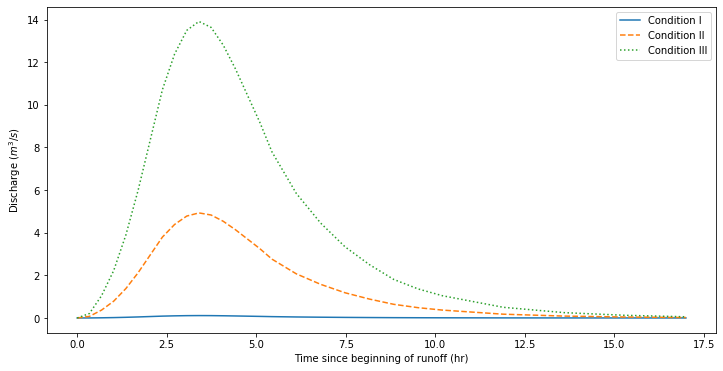

In [4]:
# Define SCS Dimensionless Unit Hydrograph
ttpk = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0, 
        2.2, 2.4, 2.6, 2.8, 3.0, 3.5, 4.0, 4.5, 5.0])
qqpk = np.array([0.0, 0.015, 0.075, 0.16, 0.28, 0.43, 0.60, 0.77, 0.89, 0.97, 1.00, 0.98, 0.92, 0.84, 0.75, 0.66,
        0.56, 0.42, 0.32, 0.24, 0.18, 0.13, 0.098, 0.075, 0.036, 0.018, 0.009, 0.004])

# Calculate the outflow hydrograph for each condition
t = ttpk*T_Pstar
q_I = qqpk*qpk_I
q_II = qqpk*qpk_II
q_III = qqpk*qpk_III

# Plot the hydrographs
plt.figure(1,figsize=(12,6))
plt.plot(t, q_I,label='Condition I')
plt.plot(t, q_II,'--',label='Condition II')
plt.plot(t, q_III,':',label='Condition III')
plt.xlabel('Time since beginning of runoff (hr)') 
plt.ylabel('Discharge ($m^3/s$)')
plt.legend()
plt.show()